In [55]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Flatten,Dense,Conv2D,Flatten,MaxPool2D
from tensorflow.keras import Sequential
import matplotlib.pyplot as plt

In [56]:
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

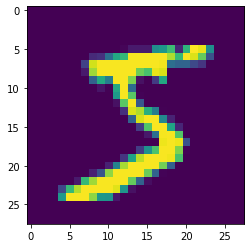

In [57]:
plt.imshow(x_train[0])

In [58]:
x_train.shape,x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [59]:
x_train=x_train/255
x_test=x_test/255
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [60]:
model=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    MaxPool2D((2,2)),
    Flatten(),
    Dense(100,activation='relu'),
    Dense(10,activation='softmax')
])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 5408)              0         
                                                                 
 dense_10 (Dense)            (None, 100)               540900    
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
________________________________________________

In [61]:
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [62]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10).history

Epoch 1/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.4679 - accuracy: 0.8724 - val_loss: 0.2444 - val_accuracy: 0.9289
Epoch 2/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.2234 - accuracy: 0.9341 - val_loss: 0.1802 - val_accuracy: 0.9471
Epoch 3/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1716 - accuracy: 0.9495 - val_loss: 0.1465 - val_accuracy: 0.9569
Epoch 4/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.1393 - accuracy: 0.9590 - val_loss: 0.1263 - val_accuracy: 0.9617
Epoch 5/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.1178 - accuracy: 0.9656 - val_loss: 0.1110 - val_accuracy: 0.9671
Epoch 6/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.1027 - accuracy: 0.9697 - val_loss: 0.1015 - val_accuracy: 0.9668
Epoch 7/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0917 - accuracy: 0.9727 - val_loss: 0.0878 -

In [63]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Accuracy=%.3f"%test_acc)
print("Loss=%.3f"%test_loss)

313/313 [==============================] - 2s 7ms/step - loss: 0.0779 - accuracy: 0.9759
Accuracy=0.976
Loss=0.078


In [64]:
import random
n=random.randint(0,9999)
predicted_val=model.predict(x_test)

313/313 [==============================] - 2s 7ms/step


Number is=0


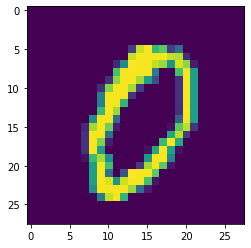

In [65]:
import numpy as np
plt.imshow(x_test[n])
print("Number is=%d"%np.argmax(predicted_val[n]))

In [66]:
history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

<function matplotlib.pyplot.show(close=None, block=None)>

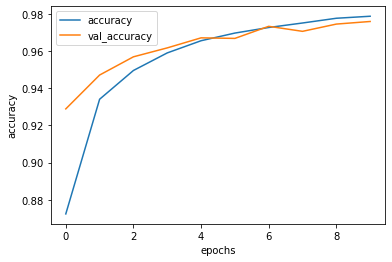

In [67]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['accuracy','val_accuracy'])
plt.show